In [85]:
import os
import pandas as pd
import glob
import re
from pprint import pprint

In [7]:
files = glob.glob('VIPM_evaluation - *.csv')
files

['VIPM_evaluation - RESNET.csv',
 'VIPM_evaluation - EFFICIENTNET.csv',
 'VIPM_evaluation - COLOR.csv',
 'VIPM_evaluation - SHAPE.csv']

In [17]:
# 1 == hit
# 0 == miss

In [69]:
def bpref(hitmissorderedlist):
    R = len(hitmissorderedlist)
    ret = sum(
        [
            1 - len(
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            ) / R
            for r in range(1,R+1)
        ]
    ) / R

    return ret

In [68]:
def bpref10(hitmissorderedlist):
    R = len(hitmissorderedlist)
    ret = sum(
        [
            1 - len(
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            ) / (10 + R)
            for r in range(1,R+1)
        ]
    ) / R

    return ret

In [92]:
def indAP(hitmissorderedlist):
    R = len(hitmissorderedlist)
    ret = sum(
        [
            1 - len(
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            ) / r
            for r in range(1,R+1)
        ]
    ) / R

    return ret

In [93]:
perfs = {}
for f in files:
    print('reading file',f)
    mode = re.search('VIPM_evaluation - (.+)\.csv', f).group(1)
    print('mode',mode)
    csv = pd.read_csv(f, header=None)
    csv = csv.astype('int')
    _bpref = csv.apply(bpref, axis=1)
    _bpref10 = csv.apply(bpref10, axis=1)
    _indAP = csv.apply(indAP, axis=1)
    csv['bpref'] = _bpref
    csv['bpref10'] = _bpref10
    csv['indAP'] = _indAP
    perfs[mode] = csv

reading file VIPM_evaluation - RESNET.csv
mode RESNET
reading file VIPM_evaluation - EFFICIENTNET.csv
mode EFFICIENTNET
reading file VIPM_evaluation - COLOR.csv
mode COLOR
reading file VIPM_evaluation - SHAPE.csv
mode SHAPE


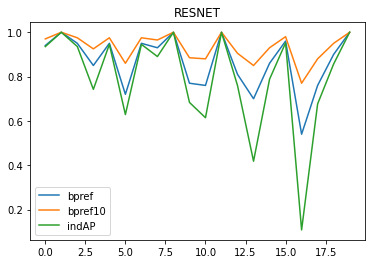

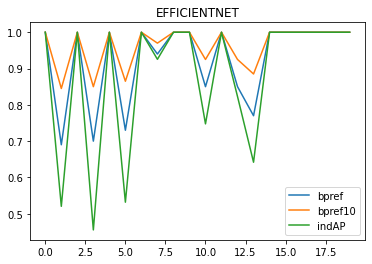

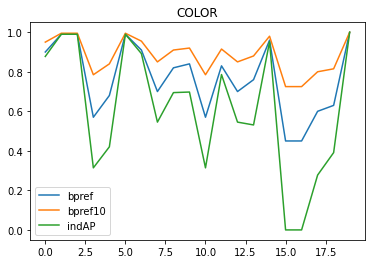

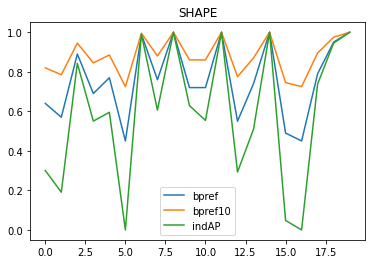

In [96]:
for k,v in perfs.items():
    v.plot(y=['bpref','bpref10','indAP'], title=k)

In [97]:
mAP = {k:v[['bpref','bpref10','indAP']].mean().to_dict() for k,v in perfs.items()}
mAP

{'RESNET': {'bpref': 0.8675,
  'bpref10': 0.9337499999999999,
  'indAP': 0.7939920634920636},
 'EFFICIENTNET': {'bpref': 0.9265000000000001,
  'bpref10': 0.96325,
  'indAP': 0.8822559523809523},
 'COLOR': {'bpref': 0.767, 'bpref10': 0.8835, 'indAP': 0.6104226190476191},
 'SHAPE': {'bpref': 0.7585,
  'bpref10': 0.8792500000000001,
  'indAP': 0.5896091269841269}}

In [107]:
mAPdf = pd.DataFrame(mAP).transpose()
mAPdf

,bpref,bpref10,indAP
RESNET,0.8675,0.93375,0.793992
EFFICIENTNET,0.9265,0.96325,0.882256
COLOR,0.7670,0.88350,0.610423
SHAPE,0.7585,0.87925,0.589609


<AxesSubplot:title={'center':'mAP'}>

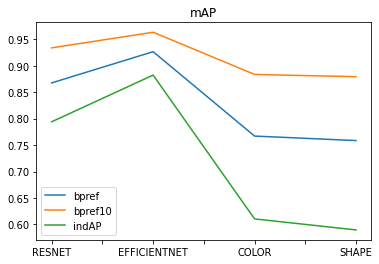

In [110]:
mAPdf.plot(title='mAP')

In [109]:
mAPdf.to_csv('mAP.csv')